In [8]:
import pandas as pd

df1 = pd.read_csv("final_tayara_data.csv")
df2 = pd.read_csv("mubawab_grand_tunis.csv")
df3 = pd.read_csv("tecnocasa_final.csv")

# Renommage
df2 = df2.rename(columns={"longitude":"lon", "latitude":"lat"})

# Alignement
df2 = df2[df1.columns]
df3 = df3[df1.columns]  


# Concaténation
merged_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

#merged_df = df3
# AFFICHAGE DU NOMBRE DE LIGNES
print("="*50)
print("NOMBRE DE LIGNES PAR SOURCE")
print("="*50)
print(f"Tayara (df1)    : {len(df1):>8,} lignes")
print(f"Mubawab (df2)   : {len(df2):>8,} lignes")
print(f"Tecnocasa (df3) : {len(df3):>8,} lignes")
print("-"*50)
print(f"TOTAL           : {len(merged_df):>8,} lignes")
print("="*50)

# Vérification rapide
print(f"\n Fusion réussie: {len(merged_df) == len(df1) + len(df2) + len(df3)}")


print(merged_df.info())


NOMBRE DE LIGNES PAR SOURCE
Tayara (df1)    :      666 lignes
Mubawab (df2)   :    2,840 lignes
Tecnocasa (df3) :      192 lignes
--------------------------------------------------
TOTAL           :    3,698 lignes

 Fusion réussie: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   prix                        3698 non-null   float64
 1   categorie                   3698 non-null   int64  
 2   surface                     3698 non-null   float64
 3   nombre_des_chambres         3698 non-null   float64
 4   nombre_des_salles_de_bains  3698 non-null   float64
 5   haut_standing               3698 non-null   int64  
 6   terrasse                    3698 non-null   int64  
 7   balcon                      3698 non-null   int64  
 8   etage                       3698 non-null   float64
 9   parking                

In [9]:
import numpy as np
plt.hist(np.log1p(merged_df["prix"]), bins=50)
plt.title("Log Price Distribution")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
print("Duplicates:", merged_df.duplicated().sum())
merged_df = merged_df.drop_duplicates()
print(merged_df.isna().sum())


Duplicates: 29
prix                          0
categorie                     0
surface                       0
nombre_des_chambres           0
nombre_des_salles_de_bains    0
haut_standing                 0
terrasse                      0
balcon                        0
etage                         0
parking                       0
ascenseur                     0
jardin                        0
vue_panoramique               0
climatiseur                   0
chauffage_central             0
piscine                       0
lat                           0
lon                           0
dtype: int64


In [ ]:
print("Surface = 0 count:", (merged_df["surface"] == 0).sum())
merged_df = merged_df[merged_df["surface"] > 0]
merged_df["price_per_m2"] = merged_df["prix"] / merged_df["surface"]



Surface = 0 count: 49


In [ ]:
merged_df = merged_df[
    (merged_df["price_per_m2"] > 500) &
    (merged_df["price_per_m2"] < 13000)
]

In [ ]:
print("Unique values nb de chambres:")
print(sorted(merged_df["nombre_des_chambres"].unique()))
print("Unique values nb de salle de bain:")
print(sorted(merged_df["nombre_des_salles_de_bains"].unique()))


Unique values nb de chambres:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 48.0]
Unique values nb de salle de bain:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 24.0, 1450000.0]


In [ ]:
# Remove extreme unrealistic values
merged_df = merged_df[
    merged_df["nombre_des_chambres"] <= 15
]
merged_df = merged_df[
    merged_df["nombre_des_salles_de_bains"] <= 10
]

In [ ]:
print("Total number of rows:", len(merged_df))


Total number of rows: 3550


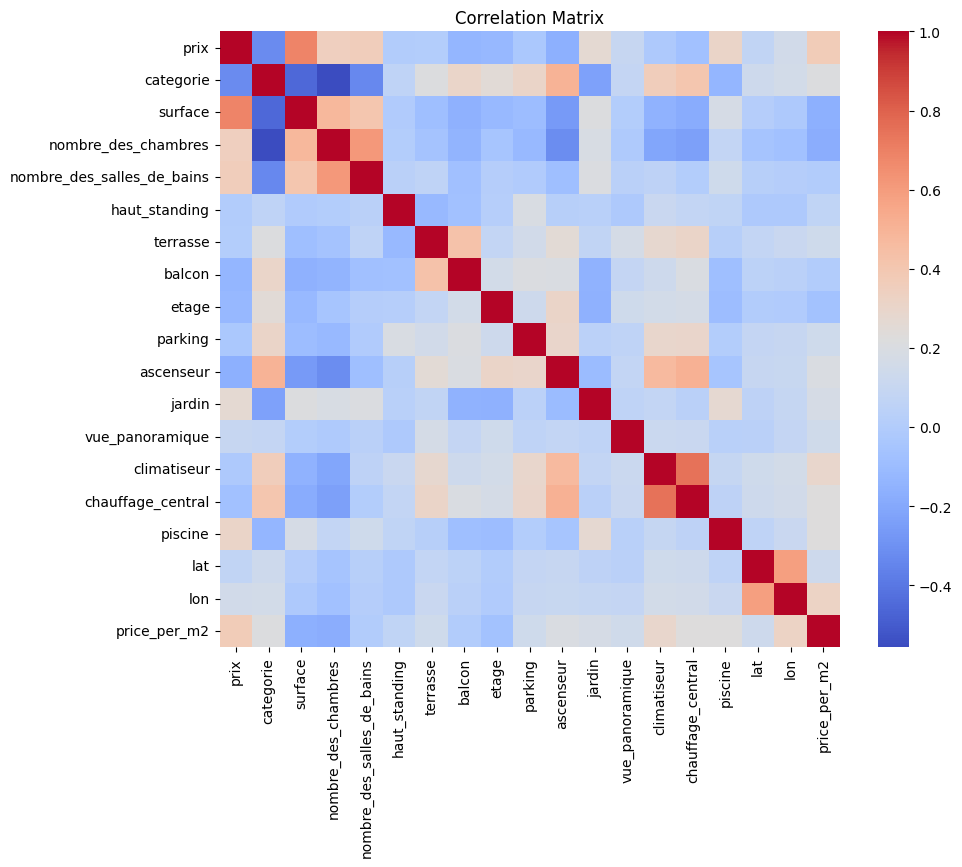

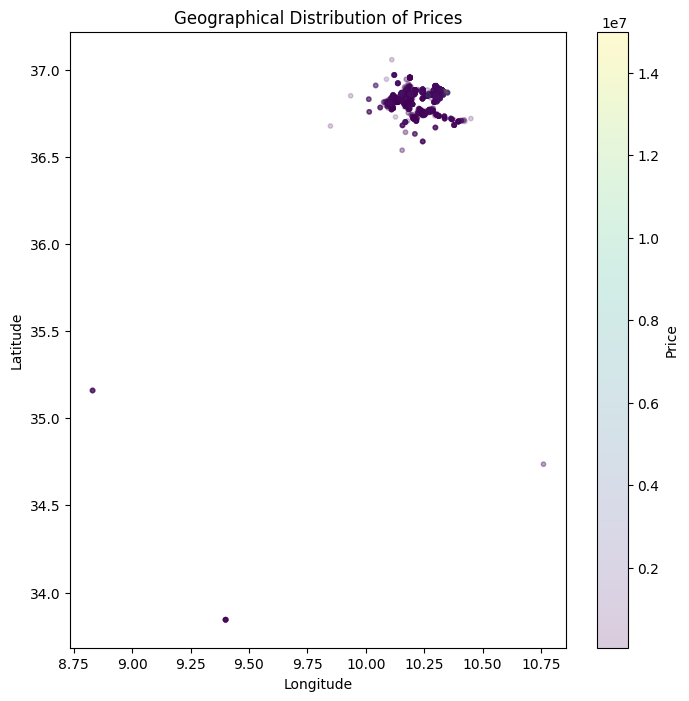

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(merged_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(
    merged_df["lon"],
    merged_df["lat"],
    c=merged_df["prix"],
    cmap="viridis",
    alpha=0.2,      # more transparency
    s=10            # smaller points
)

plt.colorbar(label="Price")
plt.title("Geographical Distribution of Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


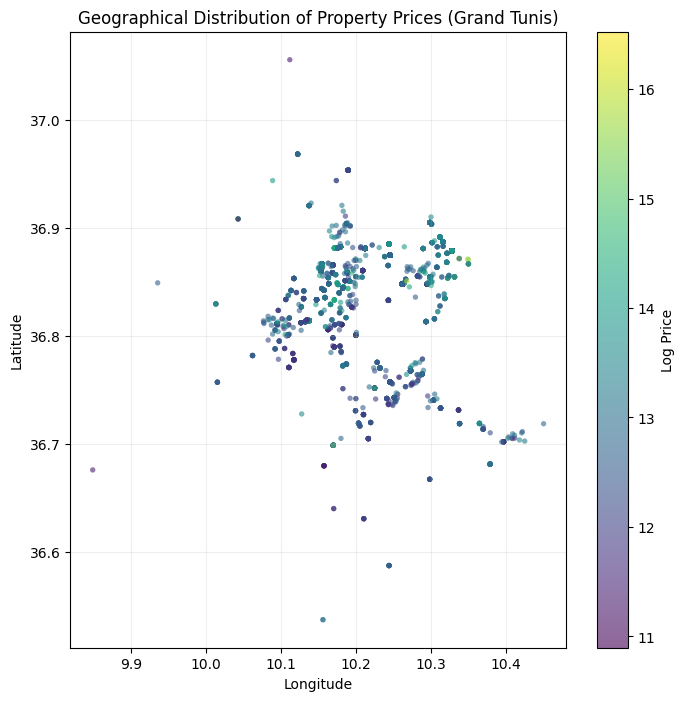

In [ ]:
merged_df = merged_df[
    (merged_df["lat"] > 36.5) &
    (merged_df["lat"] < 37.5) &
    (merged_df["lon"] > 9.75) &
    (merged_df["lon"] < 10.5)
]
plt.figure(figsize=(8,8))
plt.scatter(
    merged_df["lon"],
    merged_df["lat"],
    c=np.log1p(merged_df["prix"]),
    cmap="viridis",
    alpha=0.6,
    s=15,
    edgecolors='none'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Property Prices (Grand Tunis)")
plt.grid(alpha=0.2)
plt.colorbar(label="Log Price")
plt.show()



In [ ]:
from sklearn.cluster import KMeans

coords = merged_df[["lat", "lon"]]
kmeans = KMeans(n_clusters=6, random_state=42)

eda_df = merged_df.copy()

eda_df["geo_cluster"] = kmeans.fit_predict(coords)

centers = kmeans.cluster_centers_
print(centers)


cluster_price = eda_df.groupby("geo_cluster")["prix"].mean().sort_values()
print(cluster_price)



[[36.87552425 10.18140071]
 [36.85885934 10.26784284]
 [36.71524637 10.34940724]
 [36.74052853 10.23418769]
 [36.88159232 10.318774  ]
 [36.81349738 10.13177026]]
geo_cluster
3    3.786723e+05
5    4.759581e+05
2    5.144170e+05
0    5.621328e+05
1    5.967553e+05
4    1.046922e+06
Name: prix, dtype: float64


In [ ]:
cluster_names = {
    3: "Budget Housing",
    5: "Lower-Middle Segment",
    2: "Middle Segment",
    0: "Upper-Middle Segment",
    1: "Premium Segment",
    4: "Luxury Segment"
}


eda_df["cluster_name"] = eda_df["geo_cluster"].map(cluster_names)


In [ ]:
plt.figure(figsize=(7,7))

for cluster in eda_df["geo_cluster"].unique():
    subset = eda_df[eda_df["geo_cluster"] == cluster]
    plt.scatter(
        subset["lon"],
        subset["lat"],
        label=cluster_names[cluster],
        alpha=0.6
    )

plt.legend()
plt.title("Geographic Clusters of Properties")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
import folium

# Center map on Tunis
map_center = [eda_df["lat"].mean(), eda_df["lon"].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# Colors for clusters
colors = ["red", "blue", "green", "purple", "orange", "darkred"]

for _, row in eda_df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=3,
        color=colors[row["geo_cluster"]],
        fill=True,
        fill_opacity=0.7,
        popup=f"Price: {row['prix']:.0f} TND\nCluster: {cluster_names[row['geo_cluster']]}"
    ).add_to(m)

m


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Label

y = np.log1p(merged_df["prix"].values).reshape(-1,1)

X = merged_df.drop(columns=["prix", "price_per_m2"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)


ValueError: could not convert string to float: 'Luxury Segment'

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.17
R²: 0.67


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=200,   # number of trees
    learning_rate=0.05, # smaller learning rate for stability
    max_depth=5,
    subsample=0.8,      # optional, helps prevent overfitting
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on scaled data
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.10
R²: 0.82


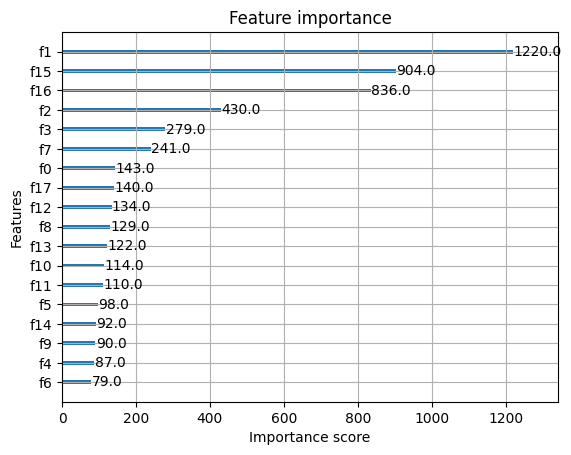

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

